In [131]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # statistical data visualization
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [132]:
data = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/acea-water-prediction/Water_Spring_Lupa.csv")
data.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN


In [133]:
data.dtypes

Date               object
Rainfall_Terni    float64
Flow_Rate_Lupa    float64
dtype: object

In [134]:
#Dữ liệu lặp lại nhiều nên ta gộp lại trung bình theo tháng
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)
data.tail(10)

,Date,Rainfall_Terni,Flow_Rate_Lupa
4189,2020-06-21,0.0,-75.64
4190,2020-06-22,0.0,-75.31
4191,2020-06-23,0.0,-74.88
4192,2020-06-24,0.0,-74.58
4193,2020-06-25,0.0,-74.29
4194,2020-06-26,0.0,-73.93
4195,2020-06-27,0.0,-73.60
4196,2020-06-28,0.0,-73.14
4197,2020-06-29,0.0,-72.88
4198,2020-06-30,0.0,-72.55


In [135]:
#Gộp trung bình lượng mua theo tháng
data2 = data.resample('ME', on='Date').mean().reset_index()
data2.head()

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,2009-01-31,2.797,NaN
1,2009-02-28,2.763,-169.618000
2,2009-03-31,2.076,-179.666452
3,2009-04-30,2.790,-180.168889
4,2009-05-31,1.139,-156.845000


<Axes: xlabel='Date'>

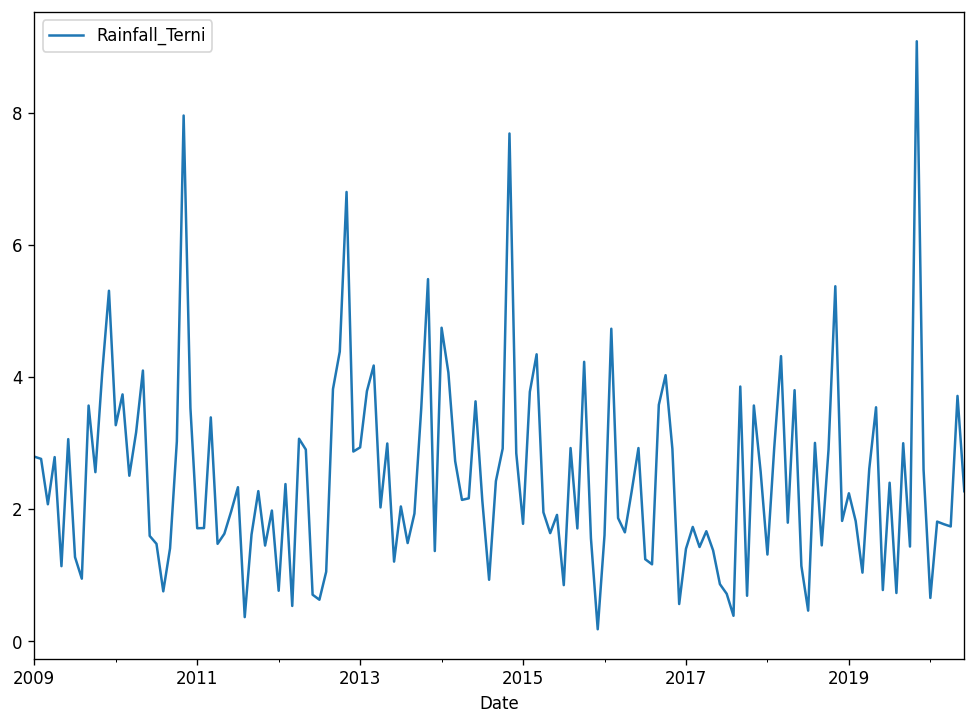

In [136]:
data2.plot(x='Date',y='Rainfall_Terni',kind='line')

0.184 9.084


<Axes: xlabel='Date'>

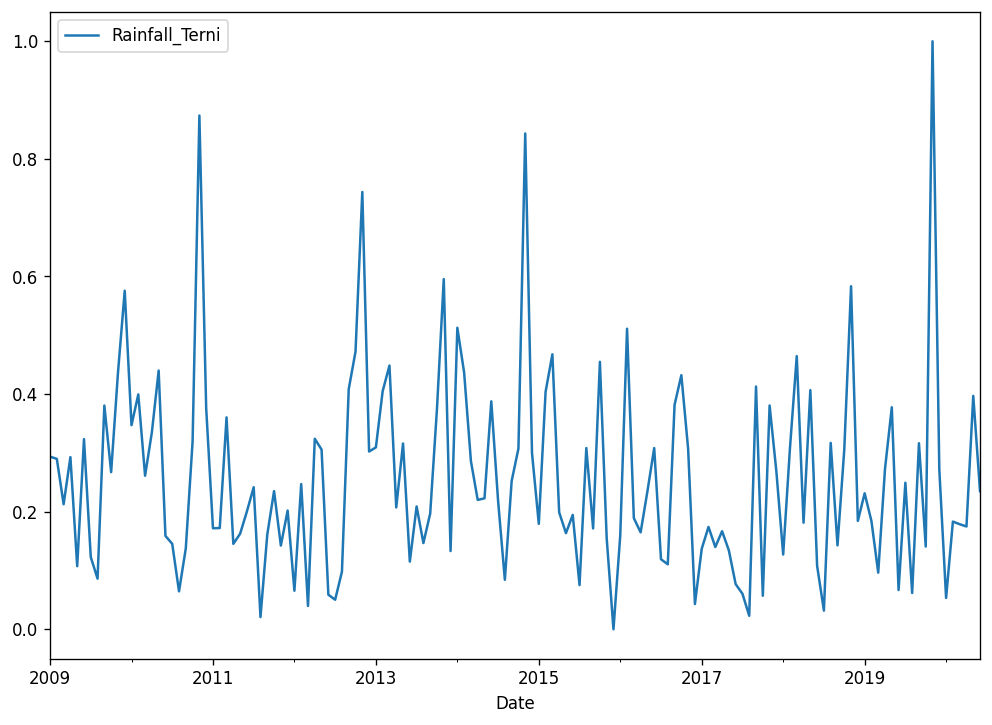

In [137]:
#Min-max normalization
min = data2['Rainfall_Terni'].min()
max = data2['Rainfall_Terni'].max()
print(min,max)
def Min_max_normalization(x):
  x_scaled = (x - min)/(max - min)
  return x_scaled

data2['Rainfall_Terni'] = data2['Rainfall_Terni'].apply(Min_max_normalization)
data2.plot(x='Date',y='Rainfall_Terni',kind='line')

In [138]:
#Thêm cột Year và Month
data2['Year'] = data2.Date.dt.year
data2['Month'] = data2.Date.dt.month
#Pivot
pivot = data2.pivot(index='Month', columns='Year', values='Rainfall_Terni')
pivot.head(12)

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,,,,,,
1,0.293596,0.347079,0.171798,0.065506,0.309326,0.512809,0.179326,0.160000,0.136854,0.127079,0.231236,0.053266
2,0.289775,0.399438,0.172135,0.246966,0.404944,0.436517,0.403820,0.511124,0.174045,0.308202,0.184045,0.183123
3,0.212584,0.261124,0.360337,0.039663,0.448539,0.285955,0.467640,0.189101,0.139888,0.464494,0.096292,0.178673
4,0.292809,0.334944,0.145281,0.324045,0.207191,0.220000,0.198876,0.164831,0.166742,0.181236,0.272697,0.174831
5,0.107303,0.440000,0.162472,0.305618,0.315955,0.222697,0.163483,0.234494,0.134045,0.406629,0.377528,0.396868
6,0.323371,0.158764,0.200337,0.058764,0.115056,0.387640,0.194494,0.308202,0.076742,0.107753,0.066742,0.234757
7,0.122697,0.145281,0.241573,0.050225,0.208876,0.218764,0.075056,0.119101,0.060337,0.031685,0.249213,NaN
8,0.086067,0.064494,0.020674,0.097865,0.146629,0.084157,0.308202,0.110449,0.022921,0.316966,0.061685,NaN
9,0.380449,0.137753,0.161011,0.408427,0.196742,0.252022,0.171461,0.381685,0.412809,0.142697,0.316404,NaN


In [139]:
#delete year 2020
data2 = data2[data2['Year'] != 2020]
pivot = data2.pivot(index='Month', columns='Year', values='Rainfall_Terni')
pivot.head(12)

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Month,,,,,,,,,,,
1,0.293596,0.347079,0.171798,0.065506,0.309326,0.512809,0.179326,0.160000,0.136854,0.127079,0.231236
2,0.289775,0.399438,0.172135,0.246966,0.404944,0.436517,0.403820,0.511124,0.174045,0.308202,0.184045
3,0.212584,0.261124,0.360337,0.039663,0.448539,0.285955,0.467640,0.189101,0.139888,0.464494,0.096292
4,0.292809,0.334944,0.145281,0.324045,0.207191,0.220000,0.198876,0.164831,0.166742,0.181236,0.272697
5,0.107303,0.440000,0.162472,0.305618,0.315955,0.222697,0.163483,0.234494,0.134045,0.406629,0.377528
6,0.323371,0.158764,0.200337,0.058764,0.115056,0.387640,0.194494,0.308202,0.076742,0.107753,0.066742
7,0.122697,0.145281,0.241573,0.050225,0.208876,0.218764,0.075056,0.119101,0.060337,0.031685,0.249213
8,0.086067,0.064494,0.020674,0.097865,0.146629,0.084157,0.308202,0.110449,0.022921,0.316966,0.061685
9,0.380449,0.137753,0.161011,0.408427,0.196742,0.252022,0.171461,0.381685,0.412809,0.142697,0.316404


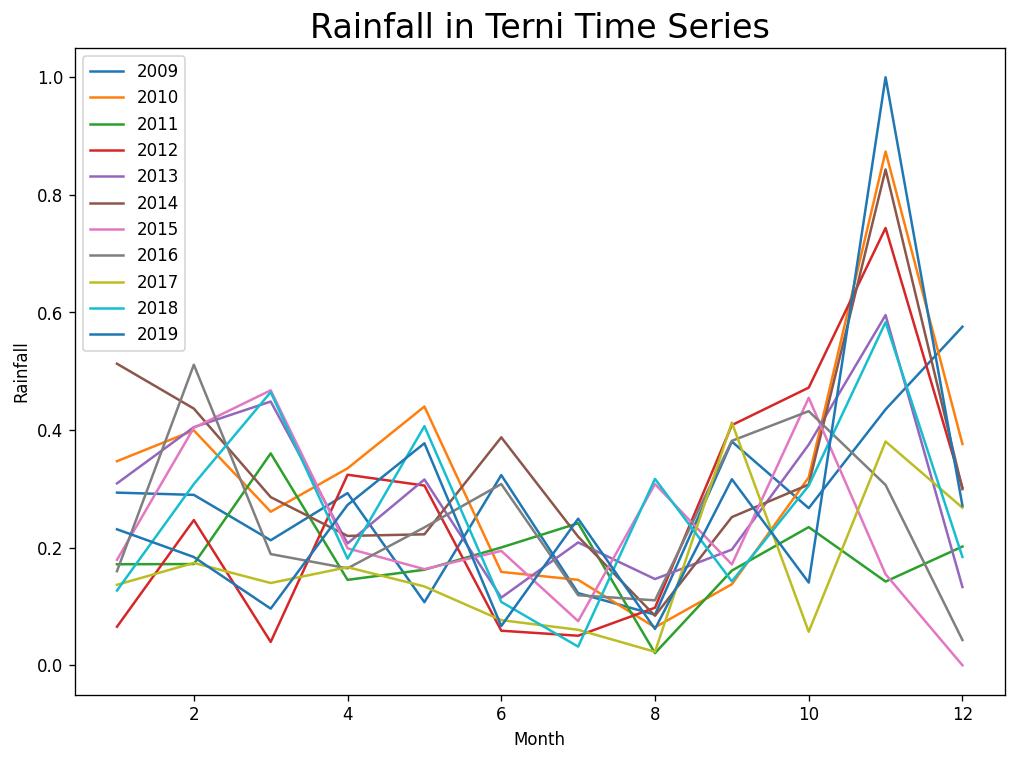

In [140]:
pivot.plot()
plt.title("Rainfall in Terni Time Series", fontsize=20)
plt.ylabel("Rainfall")
plt.legend(loc='upper left')
plt.show()

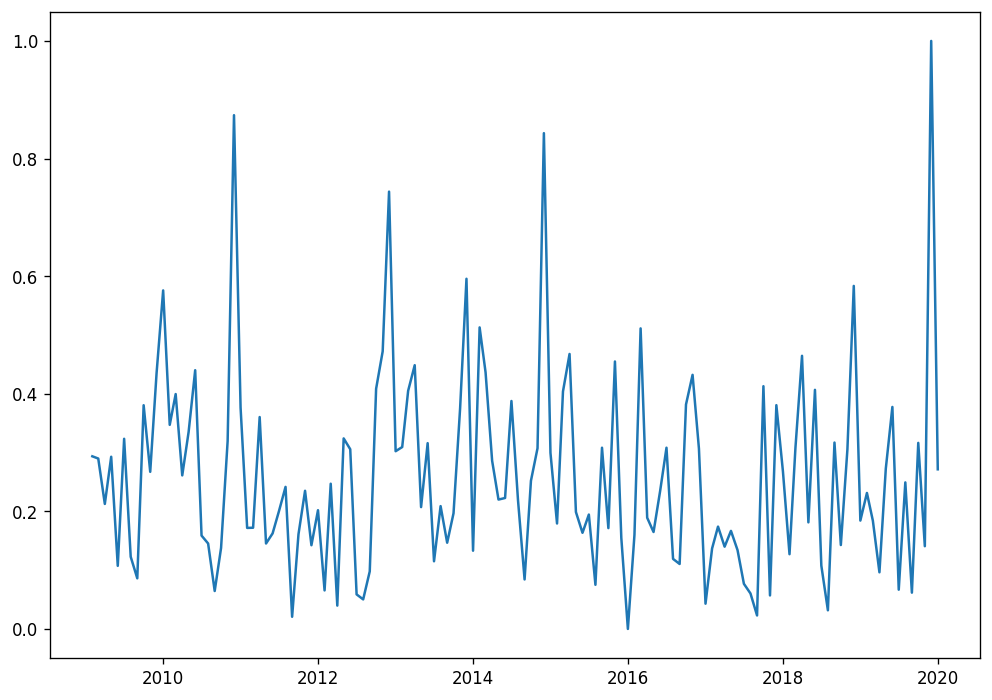

In [141]:
plt.plot(data2['Date'],data2['Rainfall_Terni'])

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

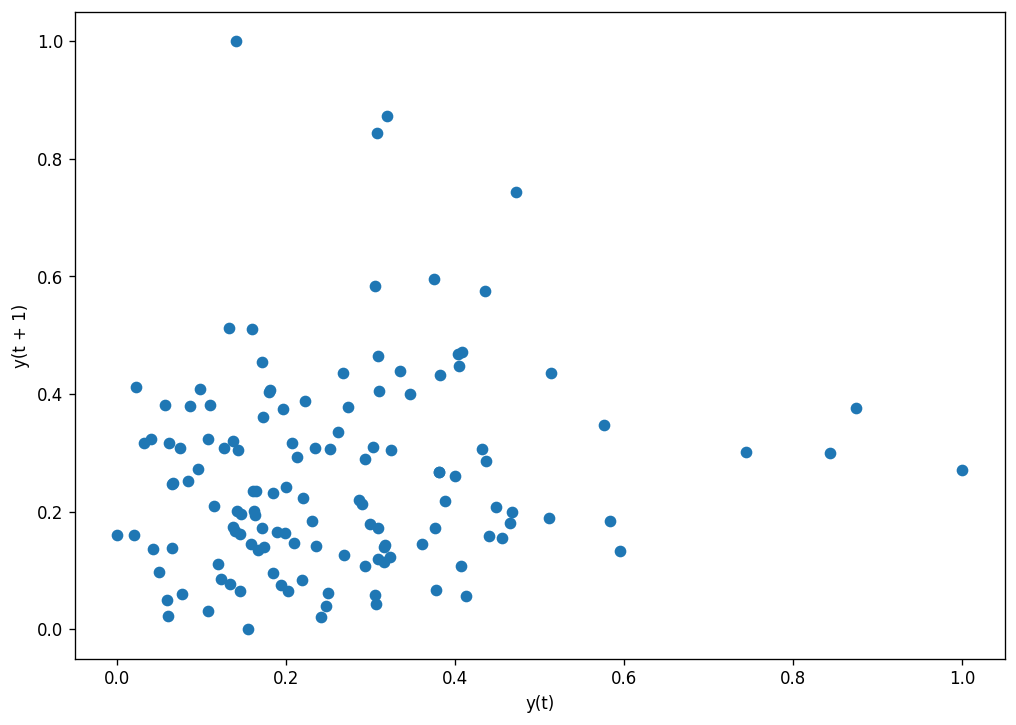

In [142]:
#Đồ thị khá xấu, quan hệ tuyến tính chưa rõ ràng
from pandas.plotting import lag_plot
lag_plot(pd.DataFrame(data2['Rainfall_Terni']))

In [143]:
from statsmodels.tsa.ar_model import AutoReg

out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'

ts_diff = np.diff(data2['Rainfall_Terni'])
data2['Rainfall_Terni_diff1'] = np.append([0], ts_diff)
ar_data = data2['Rainfall_Terni_diff1'].values

# ar_data = data2['Rainfall_Terni']
model1 =  AutoReg(ar_data, 3).fit()
print(out.format(model1.aic, model1.hqic, model1.bic))

AIC: -53.319, HQIC: -47.509, BIC: -39.020


C:\Users\nguye\AppData\Local\Temp\ipykernel_10980\44519427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Rainfall_Terni_diff1'] = np.append([0], ts_diff)


In [144]:
from sklearn.metrics import mean_squared_error
pred = model1.predict(3, 100)
rmse = np.sqrt(mean_squared_error(ar_data[3:101], pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.176


In [145]:
model = AutoReg(ar_data, lags=6, seasonal=True, period=12)
model_results = model.fit()
print(out.format(model_results.aic, model_results.hqic, model_results.bic))
print(f"Params of model: Trend={model.trend}, Seasonal={model.seasonal}, Period={ model.period}")

pred = model_results.predict(6, 100)
rmse = np.sqrt(mean_squared_error(ar_data[6:101], pred))
print('Test RMSE: %.3f' % rmse)

AIC: -102.777, HQIC: -80.884, BIC: -48.888
Params of model: Trend=c, Seasonal=True, Period=12
Test RMSE: 0.136


In [146]:
def get_ar_model_results(data=None, lags=3, seasonal=False, period=12):
    model = AutoReg(data, lags=lags, seasonal=seasonal, period=period)
    model_results = model.fit()

    pred = model_results.predict(lags+1, len(data))
    rmse = np.sqrt(mean_squared_error(data[lags:], pred))
    return rmse, model_results.aic

list_lags = [3, 6, 9, 12]
list_seasonal = [True, False]
list_period = [6, 12, 18, 24]

#index meaning: 0=AIC, 1= stat
stat_with_least_aic = [np.inf,"",]



for id_lag, lags in enumerate(list_lags):
    for id_ss, seasonal in enumerate(list_seasonal):
        for id_period, period in enumerate(list_period):
            rmse, aic = get_ar_model_results(ar_data, lags, seasonal, period)
            if aic < stat_with_least_aic[0]:
                stat_with_least_aic = [aic,f"Lag={lags}, Seasonal={seasonal}, Period={period}, RMSE={rmse}, AIC={aic}"]
print(f"Smallest AIC model has " + stat_with_least_aic[1])

Smallest AIC model has Lag=3, Seasonal=True, Period=12, RMSE=0.3602018641249473, AIC=-103.24500658509916


In [147]:
dataset = ar_data
size_dataset = len(data2)
train, test = dataset[:size_dataset-20], dataset[size_dataset-20:]
#Dùng các thông số ở cell trên
model = AutoReg(train, lags=3, seasonal=True, period=12)
model_fit = model.fit()

Test RMSE: 0.271


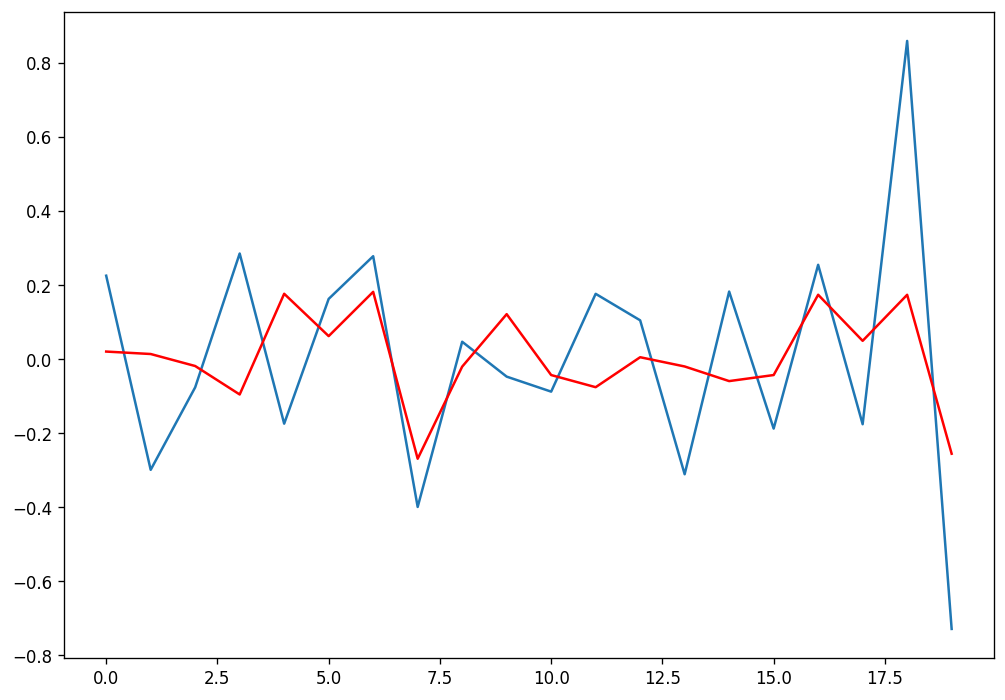

In [148]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [159]:
from statsmodels.tsa.arima.model import ARIMA

def get_arima_model_result(data=None, order=(1,0,4)):
    model = ARIMA(data, order=order)
    model_results = model.fit()

    pred = model_results.predict(lags+1, len(data))
    rmse = np.sqrt(mean_squared_error(data[lags:], pred))
    return rmse, model_results.aic

list_orders=[
 (x,0,y) for x in range(1,5) for y in range(20,24)   
]

#index meaning: 0=AIC, 1= stat
stat_with_least_rmse = [np.inf,"",]



for order in list_orders:
    rmse, aic = get_arima_model_result(ar_data, order)
    if rmse < stat_with_least_rmse[0]:
        stat_with_least_rmse = [rmse,f"Order = {order}"]
print(f"Smallest AIC model has " + stat_with_least_rmse[1])


c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found

Smallest AIC model has Order = (2, 0, 20)


c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Coefficients: [-0.00060306 -0.39895561 -0.57803366 -0.36508944  0.12703751 -0.51846513
  0.04586985  0.03029433 -0.02995803 -0.21712946 -0.0065943  -0.23191024
  0.02352007  0.17377193  0.17973941 -0.03037682  0.02749922  0.06614425
  0.01616648  0.00977641 -0.07828584 -0.03852279 -0.11483251  0.02264523]
Test RMSE: 0.324


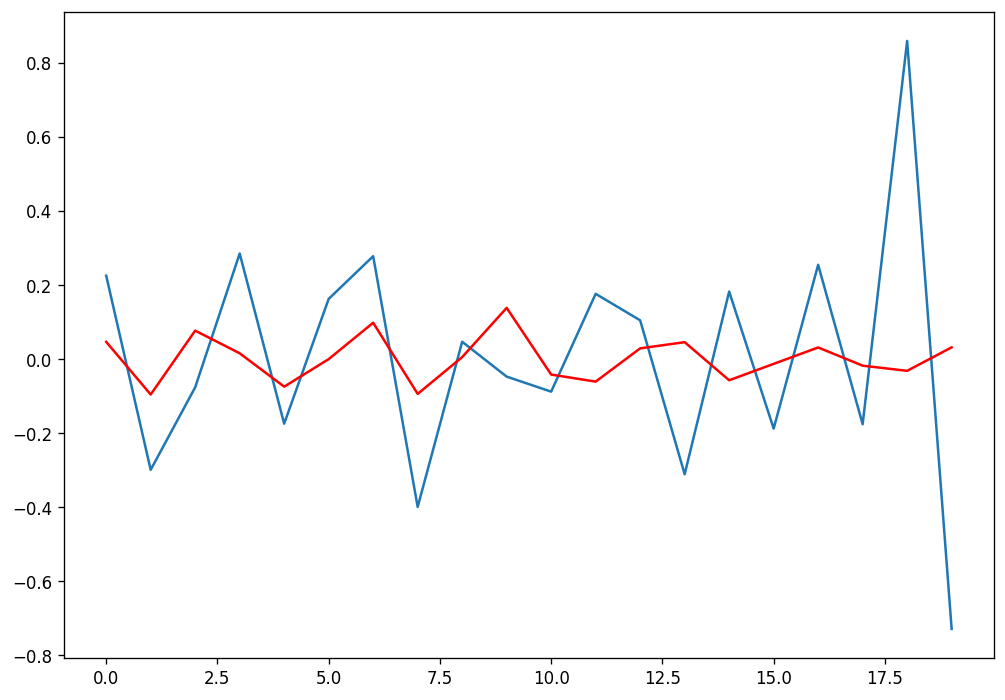

In [161]:
model = ARIMA(train, order=(2, 0, 20))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [162]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  112
Model:                ARIMA(2, 0, 20)   Log Likelihood                  50.515
Date:                Sun, 03 Mar 2024   AIC                            -53.029
Time:                        04:36:18   BIC                             12.215
Sample:                             0   HQIC                           -26.558
                                - 112                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.001     -0.404      0.687      -0.004       0.002
ar.L1         -0.3990      1.041     -0.383      0.702      -2.440       1.642
ar.L2         -0.5780      0.840     -0.688      0.491      -2.225       1.069
ma.L1         -0.3651      1.034     -0.353      0.724      -2.391       1.661
ma.L2          0.1270      1.066      0.119      0.905      -1.962       2.216
ma.L3         -0.5185      0.695     -0.746      0.456      -1.880       0.843
ma.L4          0.0459      0.228      0.201      0.841      -0.401       0.493
ma.L5          0.0303      0.167      0.181      0.856      -0.298       0.358
ma.L6         -0.0300      0.205     -0.146      0.884      -0.432       0.372
ma.L7         -0.2171      0.198     -1.096      0.273      -0.605       0.171
ma.L8         -0.0066      0.269     -0.025      0.980      -0.534       0.521
ma.L9         -0.2319      0.240     -0.966      0.334      -0.703       0.239
ma.L10         0.0235      0.277      0.085      0.932      -0.519       0.566
ma.L11         0.1738      0.231      0.751      0.452      -0.279       0.627
ma.L12         0.1797      0.332      0.542      0.588      -0.470       0.830
ma.L13        -0.0304      0.285     -0.107      0.915      -0.588       0.528
ma.L14         0.0275      0.258      0.106      0.915      -0.479       0.534
ma.L15         0.0661      0.257      0.257      0.797      -0.438       0.570
ma.L16         0.0162      0.269      0.060      0.952      -0.511       0.544
ma.L17         0.0098      0.235      0.042      0.967      -0.451       0.471
ma.L18        -0.0783      0.223     -0.351      0.725      -0.515       0.358
ma.L19        -0.0385      0.191     -0.202      0.840      -0.413       0.335
ma.L20        -0.1148      0.159     -0.722      0.470      -0.427       0.197
sigma2         0.0226      0.005      4.836      0.000       0.013       0.032
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                52.78
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.23
Prob(H) (two-sided):                  0.27   Kurtosis:                         5.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Mô hình AR đang cho ra kết quả tốt nhất